In [93]:
%pip install --upgrade pip
%pip install pandas openpyxl yfinance matplotlib --quiet

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import os
import openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [94]:
start_date = "1970-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

In [95]:
# 1. Scarico il file raw da GitHub
sxxp_ticker = "https://raw.githubusercontent.com/Ciocco01/Take_home_asset/main/SeriestoricaSXXP.xlsx"
df = pd.read_excel(sxxp_ticker)

# 2. Conversione in datetime e settaggio come indice
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.set_index("Date").sort_index()

# 3. Definizione dell’intervallo di date e filtro con .loc
start_date = start_date
end_date   = end_date
sxxp_filtered = df.loc[start_date : end_date]

# 4. Controllo colonne disponibili (opzionale, per sicurezza)
print("Colonne disponibili:", sxxp_filtered.columns.tolist())

# 5. Stampo tutti i valori di “Last Price”
pd.set_option('display.max_rows', None)
print(f"Tutti i prezzi di chiusura SXXP dal {sxxp_filtered.index.min().date()} al {sxxp_filtered.index.max().date()}:")
print(sxxp_filtered["Last Price"])
pd.reset_option('display.max_rows')


Colonne disponibili: ['Last Price']
Tutti i prezzi di chiusura SXXP dal 1986-12-31 al 2025-04-29:
Date
1986-12-31     82.76
1987-01-01     82.76
1987-01-02     82.57
1987-01-05     82.82
1987-01-06     83.28
1987-01-07     83.78
1987-01-08     83.52
1987-01-09     83.03
1987-01-12     83.64
1987-01-13     83.00
1987-01-14     82.99
1987-01-15     83.77
1987-01-16     84.15
1987-01-19     83.39
1987-01-20     83.50
1987-01-21     83.35
1987-01-22     83.48
1987-01-23     84.12
1987-01-26     83.38
1987-01-27     83.64
1987-01-28     81.87
1987-01-29     82.31
1987-01-30     83.20
1987-02-02     83.03
1987-02-03     82.31
1987-02-04     82.72
1987-02-05     82.89
1987-02-06     83.87
1987-02-09     84.03
1987-02-10     82.91
1987-02-11     83.31
1987-02-12     83.22
1987-02-13     83.75
1987-02-16     84.22
1987-02-17     84.24
1987-02-18     84.73
1987-02-19     84.75
1987-02-20     85.26
1987-02-23     84.74
1987-02-24     84.96
1987-02-25     84.99
1987-02-26     85.39
1987-02-27     

In [96]:
# 1. Scarico il file raw da GitHub
euryield10y_ticker = "https://raw.githubusercontent.com/Ciocco01/Take_home_asset/main/EUR10Y.xlsx"
df = pd.read_excel(euryield10y_ticker)

# 2. Conversione in datetime e settaggio come indice
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.set_index("Date").sort_index()

# 3. Filtro date
start_date = start_date
end_date   = end_date
eur10y_filtered = df.loc[start_date : end_date]

# 4. Controllo colonne disponibili
print("Colonne disponibili:", df_filtered.columns.tolist())

# 5. Stampo tutte le righe di “Last Price”
pd.set_option('display.max_rows', None)
print(f"Tutti i prezzi di chiusura dal {eur10y_filtered.index.min().date()} al {eur10y_filtered.index.max().date()}:")
print(eur10y_filtered["Last Price"])
pd.reset_option('display.max_rows')


Colonne disponibili: ['Last Price']
Tutti i prezzi di chiusura dal 1993-01-04 al 2025-04-29:
Date
1993-01-04    8.710
1993-01-05    8.680
1993-01-06    8.640
1993-01-07    8.620
1993-01-08    8.590
1993-01-11    8.550
1993-01-12    8.520
1993-01-13    8.530
1993-01-14    8.510
1993-01-15    8.440
1993-01-18    8.340
1993-01-19    8.330
1993-01-20    8.350
1993-01-21    8.310
1993-01-22    8.280
1993-01-25    8.320
1993-01-26    8.310
1993-01-27    8.300
1993-01-28    8.340
1993-01-29    8.320
1993-02-01    8.280
1993-02-02    8.270
1993-02-03    8.240
1993-02-04    8.210
1993-02-05    8.150
1993-02-08    8.150
1993-02-09    8.150
1993-02-10    8.180
1993-02-11    8.180
1993-02-12    8.200
1993-02-15    8.200
1993-02-16    8.190
1993-02-17    8.050
1993-02-18    8.010
1993-02-19    7.910
1993-02-22    7.800
1993-02-23    7.830
1993-02-24    7.880
1993-02-25    7.850
1993-02-26    7.780
1993-03-01    7.710
1993-03-02    7.730
1993-03-03    7.680
1993-03-04    7.670
1993-03-05    7.530
19

In [97]:
gold_ticker = "GC=F" #name of the ticker from Yahoo Finance
bitcoin_ticker = "BTC-USD" #name of the ticker from Yahoo Finance
sp500_ticker = "^GSPC" #name of the ticker from Yahoo Finance
vix_ticker = "^VIX" #name of the ticker from Yahoo Finance
cina_ticker = "000001.SS" #name of the ticker from Yahoo Finance
giappone_ticker = "^N225" #name of the ticker from Yahoo Finance
sudamerica_ticker = "LTAM.AS" #Indice delle azioni dell'America Latina
usdyield10y_ticker = "^TNX" #name of the ticker from Yahoo Finance
vstoxx_ticker = "^V2TX" #name of the ticker from Yahoo Finance

# definition of a function to download data from Yahoo Finance
def scarico_dati(ticker, start_date, end_date):
	print(f"Scaricamento dati per {ticker} dal {start_date} al {end_date}...")
	ticker_data = yf.download(ticker, start=start_date, end=end_date, interval="1wk")
	print("\nPrime righe dei dati scaricati:")
	print(ticker_data.head())
	return ticker_data

gold_data = scarico_dati(gold_ticker, start_date, end_date)
bitcoin_data = scarico_dati(bitcoin_ticker, start_date, end_date)
sp500_data = scarico_dati(sp500_ticker, start_date, end_date)
vix_data = scarico_dati(vix_ticker, start_date, end_date)
cina_data = scarico_dati(cina_ticker, start_date, end_date)
giappone_data = scarico_dati(giappone_ticker, start_date, end_date)
sudamerica_data = scarico_dati(sudamerica_ticker, start_date, end_date)
usdyield10y_data = scarico_dati(usdyield10y_ticker, start_date, end_date)
vstoxx_data = scarico_dati(vstoxx_ticker, start_date, end_date)



Scaricamento dati per GC=F dal 1970-01-01 al 2025-06-18...


[*********************100%***********************]  1 of 1 completed


Prime righe dei dati scaricati:
Price            Close        High         Low        Open Volume
Ticker            GC=F        GC=F        GC=F        GC=F   GC=F
Date                                                             
2000-08-28  277.000000  278.299988  273.899994  273.899994      0
2000-09-04  273.299988  275.799988  273.299988  275.799988    127
2000-09-11  272.299988  273.100006  272.299988  273.100006      0
2000-09-18  271.799988  271.899994  269.000000  271.399994      0
2000-09-25  273.600006  278.399994  272.000000  274.100006   4164
Scaricamento dati per BTC-USD dal 1970-01-01 al 2025-06-18...



[*********************100%***********************]  1 of 1 completed



Prime righe dei dati scaricati:
Price            Close        High         Low        Open     Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD    BTC-USD
Date                                                                 
2014-09-15  398.821014  468.174011  384.532013  465.864014  156903400
2014-09-22  377.181000  441.557007  374.332001  399.100006  186772600
2014-09-29  320.510010  391.378998  289.295990  376.928009  276657896
2014-10-06  378.549011  382.726013  302.559998  320.389008  341152804
2014-10-13  389.545990  411.697998  368.897003  377.920990  156902070
Scaricamento dati per ^GSPC dal 1970-01-01 al 2025-06-18...


[*********************100%***********************]  1 of 1 completed



Prime righe dei dati scaricati:
Price           Close       High        Low       Open    Volume
Ticker          ^GSPC      ^GSPC      ^GSPC      ^GSPC     ^GSPC
Date                                                            
1970-01-01  92.629997  94.250000  91.790001  92.059998  41010000
1970-01-08  91.650002  93.470001  90.879997  92.629997  49200000
1970-01-15  89.949997  92.489998  88.639999  91.650002  53490000
1970-01-22  86.790001  90.800003  86.440002  89.949997  52860000
1970-01-29  86.239998  87.660004  84.419998  86.790001  65060000
Scaricamento dati per ^VIX dal 1970-01-01 al 2025-06-18...


[*********************100%***********************]  1 of 1 completed



Prime righe dei dati scaricati:
Price           Close       High        Low       Open Volume
Ticker           ^VIX       ^VIX       ^VIX       ^VIX   ^VIX
Date                                                         
1990-01-01  20.110001  20.110001  17.240000  17.240000      0
1990-01-08  24.639999  24.639999  20.049999  20.260000      0
1990-01-15  22.500000  26.340000  22.500000  26.340000      0
1990-01-22  26.280001  26.700001  24.719999  26.700001      0
1990-01-29  24.320000  27.250000  24.320000  26.440001      0
Scaricamento dati per 000001.SS dal 1970-01-01 al 2025-06-18...


[*********************100%***********************]  1 of 1 completed



Prime righe dei dati scaricati:
Price             Close         High          Low         Open    Volume
Ticker        000001.SS    000001.SS    000001.SS    000001.SS 000001.SS
Date                                                                    
1997-06-30  1159.342041  1261.571045  1124.776001  1255.909058         0
1997-07-07  1154.793945  1163.447021  1066.043945  1161.707031         0
1997-07-14  1209.857056  1210.439941  1180.191040  1189.473999         0
1997-07-21  1170.862061  1223.822998  1158.135986  1215.838989         0
1997-07-28  1192.828003  1194.031006  1133.175049  1167.812988         0
Scaricamento dati per ^N225 dal 1970-01-01 al 2025-06-18...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Prime righe dei dati scaricati:
Price             Close         High          Low         Open Volume
Ticker            ^N225        ^N225        ^N225        ^N225  ^N225
Date                                                                 
1970-01-05  2283.679932  2406.219971  2283.679932  2402.850098      0
1970-01-12  2286.449951  2324.239990  2286.449951  2324.239990      0
1970-01-19  2312.000000  2325.360107  2309.379883  2309.379883      0
1970-01-26  2296.429932  2328.600098  2296.429932  2316.709961      0
1970-02-02  2302.929932  2313.310059  2296.679932  2310.449951      0
Scaricamento dati per LTAM.AS dal 1970-01-01 al 2025-06-18...



Prime righe dei dati scaricati:
Price           Close       High        Low       Open  Volume
Ticker        LTAM.AS    LTAM.AS    LTAM.AS    LTAM.AS LTAM.AS
Date                                                          
2008-01-01  25.278700  26.513500  25.278700  26.338600       0
2008-01-08  26.224600  26.297899  25.911800  26.019300       0
2008-01-15  21.737801  25.108900  21.737801  25.108900       0
2008-01-22  24.495300  24.495300  22.635500  23.034599       0
2008-01-29  25.908300  25.908300  24.899300  24.899300       0
Scaricamento dati per ^TNX dal 1970-01-01 al 2025-06-18...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^V2TX']: YFTzMissingError('possibly delisted; no timezone found')



Prime righe dei dati scaricati:
Price      Close  High   Low  Open Volume
Ticker      ^TNX  ^TNX  ^TNX  ^TNX   ^TNX
Date                                     
1970-01-01  7.99  7.99  7.86  7.86      0
1970-01-08  7.86  7.96  7.81  7.96      0
1970-01-15  7.69  7.85  7.69  7.85      0
1970-01-22  7.70  7.71  7.67  7.67      0
1970-01-29  7.50  7.77  7.50  7.77      0
Scaricamento dati per ^V2TX dal 1970-01-01 al 2025-06-18...

Prime righe dei dati scaricati:
Empty DataFrame
Columns: [(Adj Close, ^V2TX), (Close, ^V2TX), (High, ^V2TX), (Low, ^V2TX), (Open, ^V2TX), (Volume, ^V2TX)]
Index: []


In [98]:
ticker_data = [
    gold_data,
    bitcoin_data,
    sp500_data,
    vix_data,
    cina_data,
    giappone_data,
    sudamerica_data,
    usdyield10y_data,
    vstoxx_data,
    eur10y_filtered,
    sxxp_filtered
    ]

print(ticker_data)

[Price             Close         High          Low         Open  Volume
Ticker             GC=F         GC=F         GC=F         GC=F    GC=F
Date                                                                  
2000-08-28   277.000000   278.299988   273.899994   273.899994       0
2000-09-04   273.299988   275.799988   273.299988   275.799988     127
2000-09-11   272.299988   273.100006   272.299988   273.100006       0
2000-09-18   271.799988   271.899994   269.000000   271.399994       0
2000-09-25   273.600006   278.399994   272.000000   274.100006    4164
...                 ...          ...          ...          ...     ...
2025-05-19  3363.600098  3363.600098  3207.500000  3234.399902    2858
2025-05-26  3288.899902  3341.000000  3242.399902  3332.500000  154530
2025-06-02  3322.699951  3400.000000  3296.899902  3296.899902    8405
2025-06-09  3431.199951  3444.000000  3290.000000  3315.600098    6375
2025-06-16  3386.600098  3442.000000  3376.100098  3442.000000     960

[129

In [102]:
# la tua lista di DataFrame
ticker_data = [
    gold_data,
    bitcoin_data,
    sp500_data,
    vix_data,
    cina_data,
    giappone_data,
    sudamerica_data,
    usdyield10y_data,
    vstoxx_data,
    eur10y_filtered,
    sxxp_filtered
]

# i nomi che vuoi dare alle colonne, nello stesso ordine di ticker_data
ticker_names = [
    "gold",
    "bitcoin",
    "sp500",
    "vix",
    "china",
    "japan",
    "south_america",
    "usdyield10y",
    "vstoxx",
    "eur10y",
    "sxxp"
]

series_list = []

for df, name in zip(ticker_data, ticker_names):
    if df.empty:
        print(f">>> No data for {name}, skipping.")
        continue
    
    tmp = df.copy()
    
    # Caso MultiIndex sulle colonne (yfinance)
    if isinstance(tmp.columns, pd.MultiIndex):
        try:
            s = tmp["Close"].copy()
        except KeyError:
            # fallback con xs
            s = tmp.xs("Close", axis=1, level=0).copy()
    
    else:
        # DataFrame “flat”
        if "Close" in tmp.columns:
            s = tmp["Close"].copy()
        elif "Last Price" in tmp.columns:
            s = tmp["Last Price"].copy()
        else:
            # se proprio non c’è, prendo l’ultima colonna numerica
            s = tmp.iloc[:, -1].copy()
    
    # rinomino la Serie con il ticker
    s.name = name
    series_list.append(s)

# concat su axis=1: indice = date, colonne = ticker_names
close_prices = pd.concat(series_list, axis=1).sort_index()


# visualizza il risultato
display(close_prices)


>>> No data for vstoxx, skipping.


,GC=F,BTC-USD,^GSPC,^VIX,000001.SS,^N225,LTAM.AS,^TNX,eur10y,sxxp
Date,,,,,,,,,,
1970-01-01,NaN,NaN,92.629997,NaN,NaN,NaN,NaN,7.990,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN,NaN,2283.679932,NaN,NaN,NaN,NaN
1970-01-08,NaN,NaN,91.650002,NaN,NaN,NaN,NaN,7.860,NaN,NaN
1970-01-12,NaN,NaN,NaN,NaN,NaN,2286.449951,NaN,NaN,NaN,NaN
1970-01-15,NaN,NaN,89.949997,NaN,NaN,NaN,NaN,7.690,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-06-09,3431.199951,105552.023438,NaN,20.82,3376.996094,37834.250000,NaN,NaN,NaN,NaN
2025-06-10,NaN,NaN,NaN,NaN,NaN,NaN,13.700,NaN,NaN,NaN
2025-06-12,NaN,NaN,5982.720215,NaN,NaN,NaN,NaN,4.393,NaN,NaN


In [100]:
#CONTROLLARE CON MARCO FINO A QUA SE VA BENE:
# 1. CONTROLLARE LE DATE DI INIZIO E FINE DEI DATI SCARICATI
# 2. CONTROLLARE CHE LE DATE SIANO VISUALIZZATE COME TALI

In [101]:
ticker_data = []
for i in range(len(tickers)):
    ticker_data.append(yf.download(tickers[i], start="1990-01-01", end="2024-04-29", progress=False))


AttributeError: 'DataFrame' object has no attribute 'split'

In [ ]:
def scarico_dati(ticker, start_date, end_date):
    print(f"Scaricamento dati per {ticker} dal {start_date} al {end_date}...")
    ticker_data = yf.download(ticker, start=start_date, end=end_date)
    print("\nPrime righe dei dati scaricati:")
    print(ticker_data.head())
    return ticker_data

In [ ]:
gold_data = scarico_dati(gold_ticker,start_date,end_date)
sp500_data = scarico_dati(sp500_ticker,start_date,end_date)
bitcoin_data = scarico_dati(bitcoin_ticker,start_date,end_date)
vix_data = scarico_dati(vix_ticker,start_date,end_date)
vstoxx_data = scarico_dati(vstoxx_ticker,start_date,end_date)
cina_data = scarico_dati(cina_ticker,start_date,end_date)
giappone_data = scarico_dati(giappone_ticker,start_date,end_date)
sudamerica_data = scarico_dati(sudamerica_ticker,start_date,end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Scaricamento dati per GC=F dal 1900-01-01 al 2025-06-18...

Prime righe dei dati scaricati:
Price            Close        High         Low        Open Volume
Ticker            GC=F        GC=F        GC=F        GC=F   GC=F
Date                                                             
2000-08-30  273.899994  273.899994  273.899994  273.899994      0
2000-08-31  278.299988  278.299988  274.799988  274.799988      0
2000-09-01  277.000000  277.000000  277.000000  277.000000      0
2000-09-05  275.799988  275.799988  275.799988  275.799988      2
2000-09-06  274.200012  274.200012  274.200012  274.200012      0
Scaricamento dati per ^GSPC dal 1900-01-01 al 2025-06-18...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['V2TX.DE']: YFPricesMissingError('possibly delisted; no price data found  (1d 1900-01-01 -> 2025-06-18) (Yahoo error = "1d data not available for startTime=-2208991980 and endTime=1750197600. Only 100 years worth of day granularity data are allowed to be fetched per request.")')



Prime righe dei dati scaricati:
Price           Close       High        Low       Open Volume
Ticker          ^GSPC      ^GSPC      ^GSPC      ^GSPC  ^GSPC
Date                                                         
1927-12-30  17.660000  17.660000  17.660000  17.660000      0
1928-01-03  17.760000  17.760000  17.760000  17.760000      0
1928-01-04  17.719999  17.719999  17.719999  17.719999      0
1928-01-05  17.549999  17.549999  17.549999  17.549999      0
1928-01-06  17.660000  17.660000  17.660000  17.660000      0
Scaricamento dati per BTC-USD dal 1900-01-01 al 2025-06-18...

Prime righe dei dati scaricati:
Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Prime righe dei dati scaricati:
Price             Close         High          Low         Open    Volume
Ticker        000001.SS    000001.SS    000001.SS    000001.SS 000001.SS
Date                                                                    
1997-07-02  1199.061035  1261.571045  1147.331055  1255.909058         0
1997-07-03  1150.623047  1194.676025  1149.939941  1194.676025         0
1997-07-04  1159.342041  1163.249023  1124.776001  1138.921021         0
1997-07-07  1096.818970  1163.447021  1085.572021  1161.707031         0
1997-07-08  1109.666016  1115.432983  1066.043945  1092.798950         0
Scaricamento dati per ^N225 dal 1900-01-01 al 2025-06-18...

Prime righe dei dati scaricati:
Price             Close         High          Low         Open Volume
Ticker            ^N225        ^N225        ^N225        ^N225  ^N225
Date                                                                 
1965-01-05  1257.719971  1257.719971  1257.719971  1257.719971      0
1965-01-06

In [ ]:
print(gold_ticker)
print(sp500_ticker)
print(bitcoin_ticker)
print(vix_ticker)
print(vstoxx_ticker)
print(cina_ticker)
print(giappone_ticker)
print(sudamerica_ticker)
print(sxxp_ticker)
print(euryield10y_ticker)
print(usdyield10y_ticker)


GC=F
^GSPC
BTC-USD
^VIX
V2TX.DE
000001.SS
^N225
LTAM.AS
https://raw.githubusercontent.com/Ciocco01/Take_home_asset/main/SeriestoricaSXXP.xlsx
https://raw.githubusercontent.com/Ciocco01/Take_home_asset/main/EUR10Y.xlsx
^TNX


In [ ]:
# Informazioni sui dati scaricati
print("\nInformazioni sul dataset:")
print(f"Periodo: dal {gold_data.index.min().strftime('%Y-%m-%d')} al {gold_data.index.max().strftime('%Y-%m-%d')}")
print(f"Numero totale di osservazioni: {len(gold_data)}")



Informazioni sul dataset:
Periodo: dal 2000-08-30 al 2025-04-28
Numero totale di osservazioni: 6186


PROCEDIAMO A VISUALIZZARE I GRAFICI DEI PREZZI DI CHIUSURA DI ORO, BITCOIN, S&P 500, VIX, EURSTOXX600, YIELD CURVE EUR E USD.

PER PRIMA COSA CREO UN DATAFRAME CONTENENTE SOLO I PREZZI DI CHIUSURA PER IL CALCOLO SUCCESSIVO DEI RENDIMENTI

In [ ]:
def Get_Closes (df):
    return print(df['Close'])

In [ ]:
Get_Closes(gold_data)
Get_Closes(sp500_data)
Get_Closes(bitcoin_data)
Get_Closes(vix_data)


Ticker             GC=F
Date                   
2000-08-30   273.899994
2000-08-31   278.299988
2000-09-01   277.000000
2000-09-05   275.799988
2000-09-06   274.200012
...                 ...
2025-04-22  3400.800049
2025-04-23  3276.300049
2025-04-24  3332.000000
2025-04-25  3282.399902
2025-04-28  3332.500000

[6186 rows x 1 columns]
Ticker            ^GSPC
Date                   
1927-12-30    17.660000
1928-01-03    17.760000
1928-01-04    17.719999
1928-01-05    17.549999
1928-01-06    17.660000
...                 ...
2025-04-22  5287.759766
2025-04-23  5375.859863
2025-04-24  5484.770020
2025-04-25  5525.209961
2025-04-28  5528.750000

[24446 rows x 1 columns]
Ticker           BTC-USD
Date                    
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
...                  ...
2025-04-24  93943.796875
2025-04-25  94720.500000
2025-04-26  94646.929688
2025-04-27  93754.843750
2025-04-28  94978.750000


In [ ]:
df_close=pd.DataFrame() # crea un DataFrame vuoto
tickers=[] # crea una lista con i nomi delle aziende
for company in companies:
    tick=yf.Ticker(company)
    df_company=tick.history(period='1mo')[['Close']] # close indica il prezzo di chiusura
    df_company.rename(columns={'Close':company},inplace=True) # rinomina la colonna Close con il nome dell'azienda #inplace=True indica che la modifica è permanente
    
    df_close=pd.concat([df_close,df_company],axis=1) #concatena i DataFrame df_close e df_company lungo l'asse 1

df_close

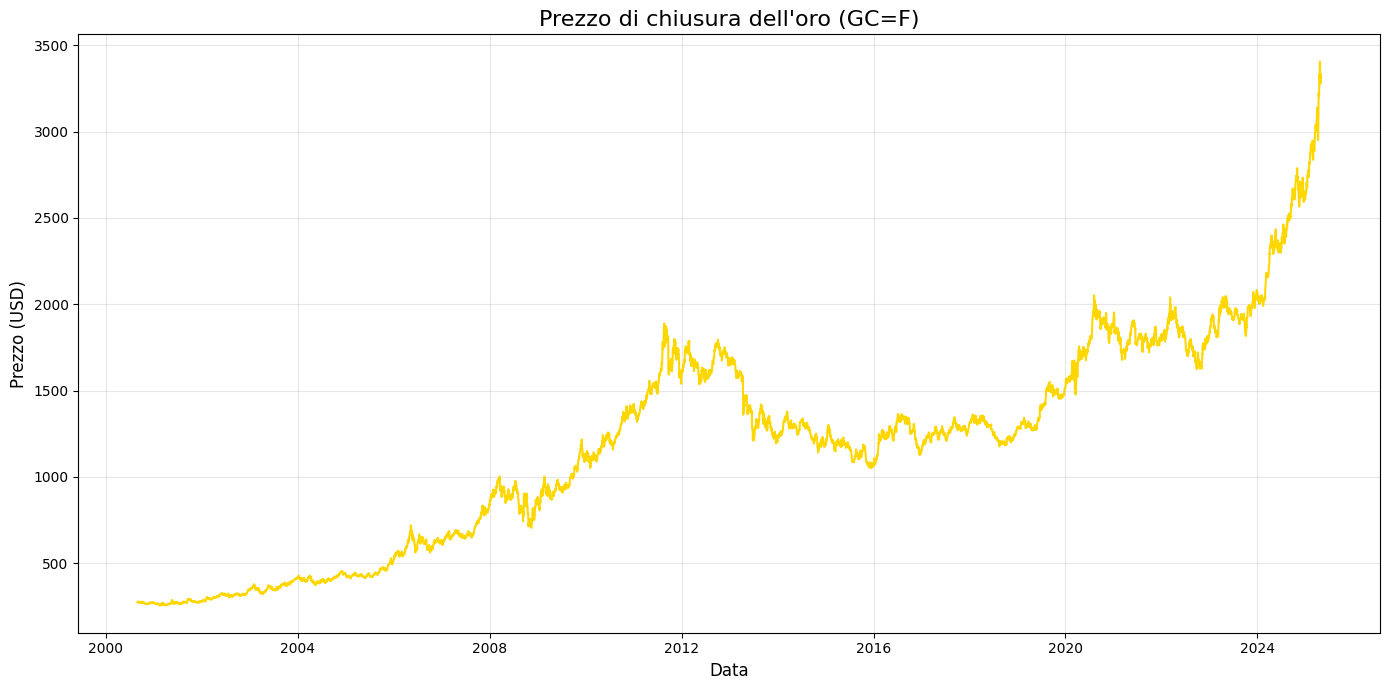

In [ ]:
# Visualizza un grafico dei prezzi di chiusura dell'oro
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Close'], color='gold')
plt.title(f'Prezzo di chiusura dell\'oro ({gold_ticker})', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Prezzo (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

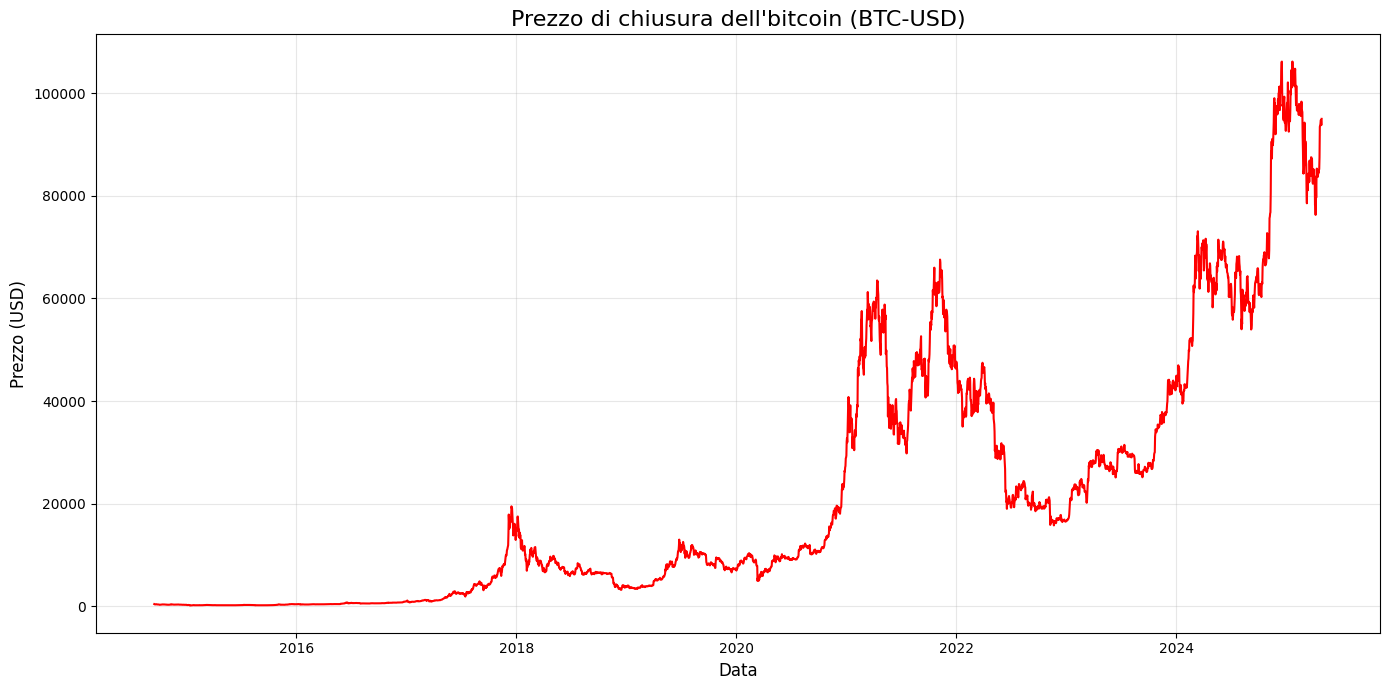

In [ ]:
# Visualizza un grafico dei prezzi di chiusura dell'BITCOIN
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Close'], color='red')
plt.title(f'Prezzo di chiusura dell\'bitcoin ({bitcoin_ticker})', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Prezzo (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

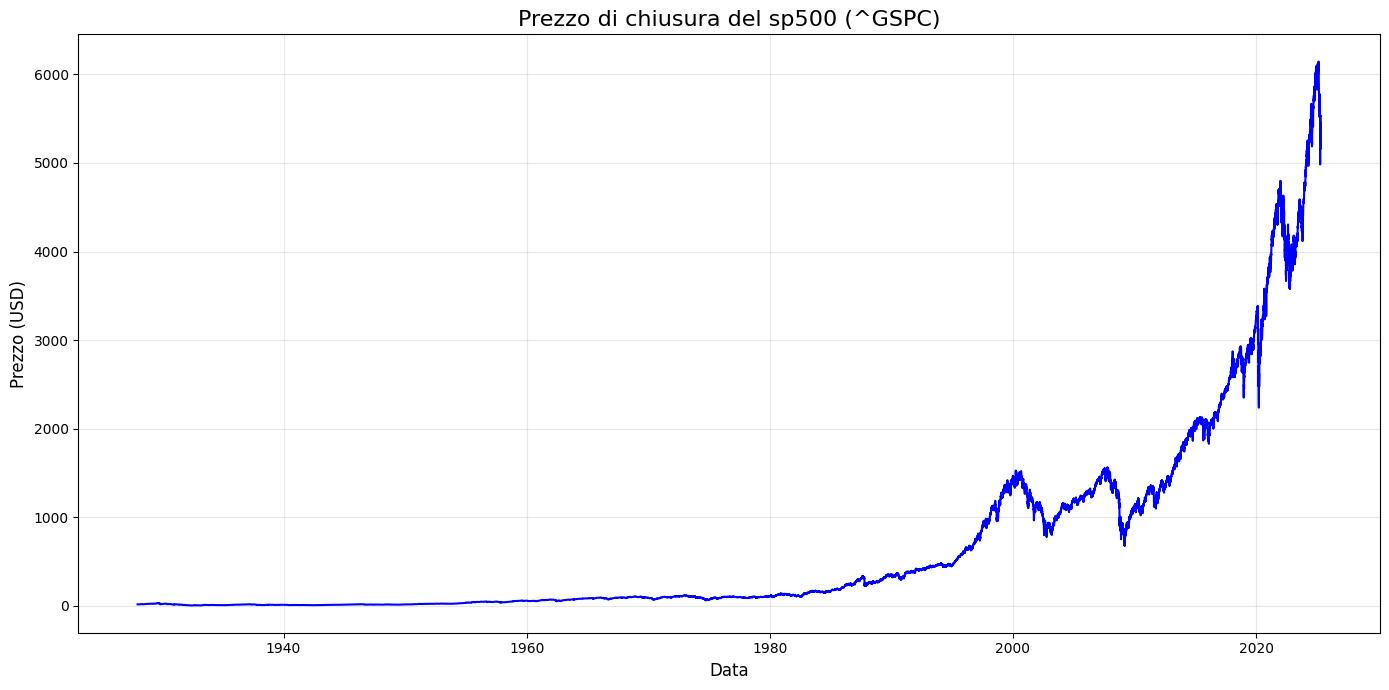

In [ ]:
# Visualizza un grafico dei prezzi di chiusura dell'S&P 500
plt.figure(figsize=(14, 7))
plt.plot(sp500_data['Close'], color='blue')
plt.title(f'Prezzo di chiusura del sp500 ({sp500_ticker})', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Prezzo (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

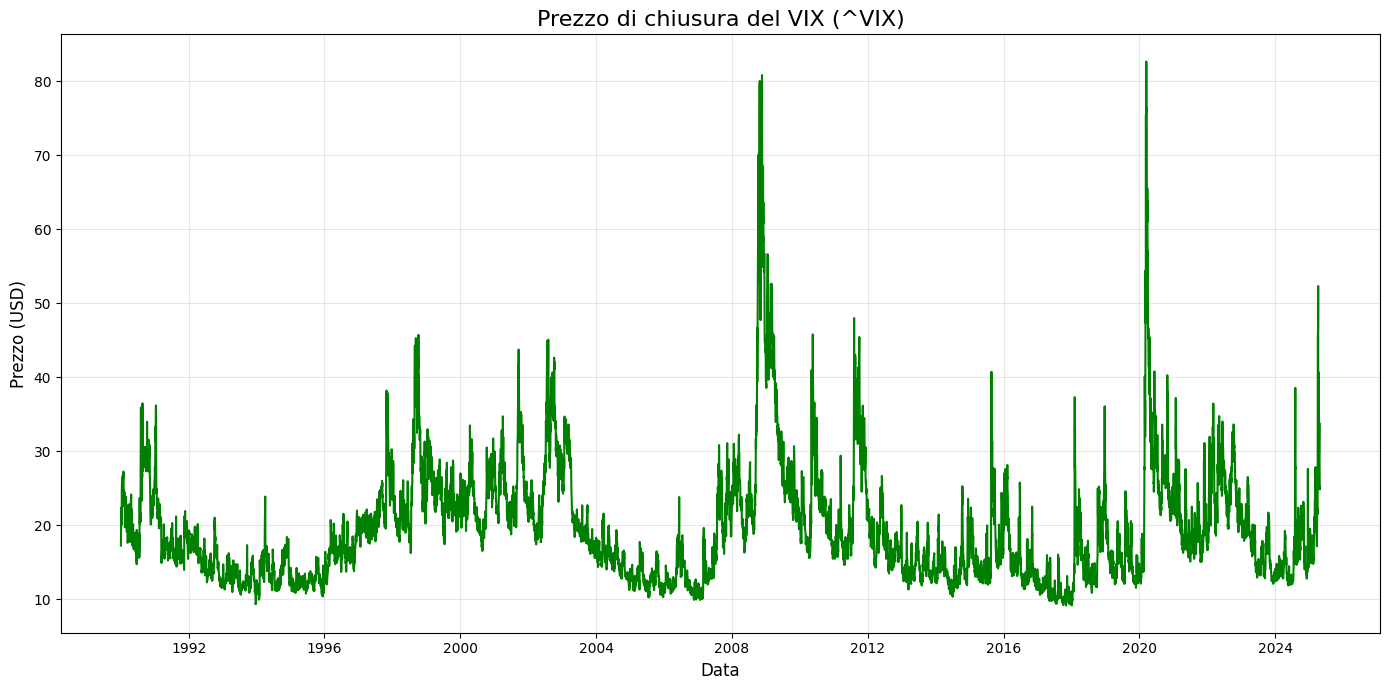

In [ ]:
# Visualizza un grafico dei prezzi di chiusura del VIX
plt.figure(figsize=(14, 7))
plt.plot(vix_data['Close'], color='green')
plt.title(f'Prezzo di chiusura del VIX ({vix_ticker})', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Prezzo (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
#FARE LO STESSO PER EURSTOXX600, YIELD CURVE EUR E USD

In [ ]:
def descrittive (dati):
    print("\nStatistiche descrittive dei prezzi di chiusura:")
    print(dati['Close'].describe())

In [ ]:
descrittive(gold_data)
descrittive(sp500_data)
descrittive(bitcoin_data)
descrittive(vix_data)
#Aggiungere anche per gli altri indici e yield curve eur e usd



Statistiche descrittive dei prezzi di chiusura:
Ticker         GC=F
count   6186.000000
mean    1184.124991
std      611.449718
min      255.100006
25%      635.500000
50%     1239.049988
75%     1642.049988
max     3406.199951

Statistiche descrittive dei prezzi di chiusura:
Ticker         ^GSPC
count   24446.000000
mean      674.889261
std      1121.879469
min         4.400000
25%        24.782501
50%       102.884998
75%      1064.712494
max      6144.149902

Statistiche descrittive dei prezzi di chiusura:
Ticker        BTC-USD
count     3877.000000
mean     21778.038146
std      25091.576914
min        178.102997
25%       1787.130005
50%       9697.500000
75%      35547.750000
max     106146.265625

Statistiche descrittive dei prezzi di chiusura:
Ticker         ^VIX
count   8896.000000
mean      19.492365
std        7.846447
min        9.140000
25%       13.857500
50%       17.639999
75%       22.840000
max       82.690002


In [ ]:
def rendimenti_gg(dati):
    dati['Daily_Return'] = dati['Close'].pct_change() * 100
    print("\nStatistiche descrittive dei rendimenti giornalieri (%):")
    print(dati['Daily_Return'])


In [ ]:
def rendimenti_m(dati):
    dati_monthly = dati.resample('ME').last()
    dati_monthly['Monthly_Return'] = dati_monthly['Close'].pct_change() * 100
    print("\nStatistiche descrittive dei rendimenti mensili (%):")
    print(dati_monthly['Monthly_Return'])

In [ ]:
rendimenti_gg(gold_data)
rendimenti_m(gold_data)
rendimenti_gg(sp500_data)
rendimenti_m(sp500_data)
rendimenti_gg(bitcoin_data)
rendimenti_m(bitcoin_data)
rendimenti_gg(vix_data)
rendimenti_m(vix_data)


Statistiche descrittive dei rendimenti giornalieri (%):
Date
2000-08-30   NaN
2000-08-31   NaN
2000-09-01   NaN
2000-09-05   NaN
2000-09-06   NaN
              ..
2025-04-22   NaN
2025-04-23   NaN
2025-04-24   NaN
2025-04-25   NaN
2025-04-28   NaN
Name: Daily_Return, Length: 6186, dtype: float64

Statistiche descrittive dei rendimenti mensili (%):
Date
2000-08-31          NaN
2000-09-30    -1.688819
2000-10-31    -3.179829
2000-11-30     1.963010
2000-12-31     0.703441
                ...    
2024-12-31    -1.046295
2025-01-31     6.971704
2025-02-28     0.864002
2025-03-31    10.081782
2025-04-30     6.715126
Freq: ME, Name: Monthly_Return, Length: 297, dtype: float64

Statistiche descrittive dei rendimenti giornalieri (%):
Date
1927-12-30         NaN
1928-01-03    0.566254
1928-01-04   -0.225230
1928-01-05   -0.959368
1928-01-06    0.626784
                ...   
2025-04-22    2.511720
2025-04-23    1.666114
2025-04-24    2.025911
2025-04-25    0.737313
2025-04-28    0.064071
Name:

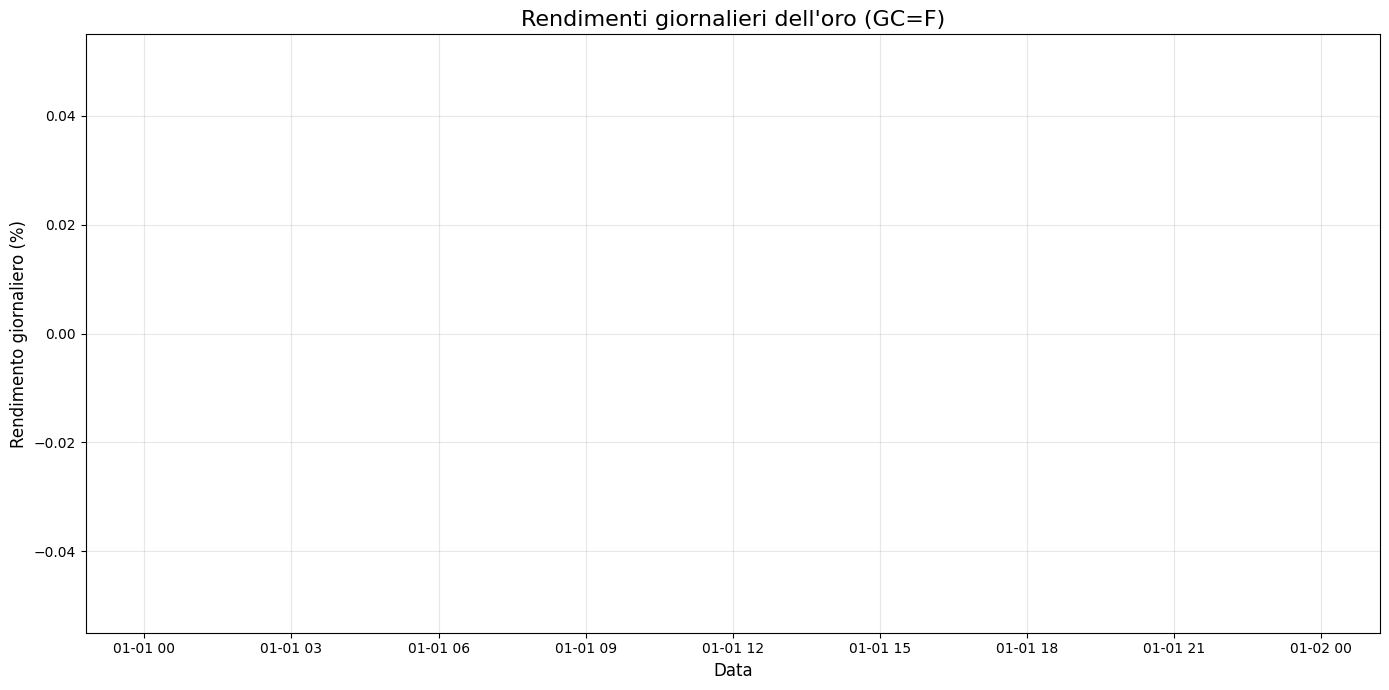

In [ ]:
# Visualizza un grafico dei rendimenti giornalieri
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Daily_Return'], color='gold')
plt.title(f'Rendimenti giornalieri dell\'oro ({gold_ticker})', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Rendimento giornaliero (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()